In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('loan_data.csv')

df = df[df['Credit_History'].notnull()]
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df = df.drop('Loan_ID', axis = 1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


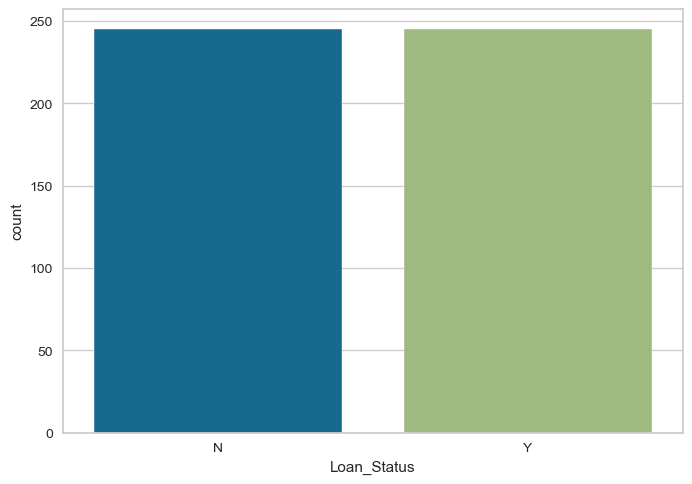

In [15]:
X = df.drop('Loan_Status', axis = 1)
X = X.values
y = df['Loan_Status']
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [16]:
label_encoder_Gender = LabelEncoder()
label_encoder_Married = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_Education = LabelEncoder()
label_encoder_Self_Employed = LabelEncoder()
label_encoder_Property_Area = LabelEncoder()
label_encoder_Loan_Status = LabelEncoder()
X[:,0] = label_encoder_Gender.fit_transform(X[:,0])
X[:,1] = label_encoder_Married.fit_transform(X[:,1])
X[:,2] = label_encoder_Dependents.fit_transform(X[:,2])
X[:,3] = label_encoder_Education.fit_transform(X[:,3])
X[:,4] = label_encoder_Self_Employed.fit_transform(X[:,4])
X[:,10] = label_encoder_Property_Area.fit_transform(X[:,10])
y = label_encoder_Loan_Status.fit_transform(y)

In [17]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.1, random_state = 0)
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((441, 11), (441,), (49, 11), (49,))

Algorithm:  entropy
Score:  0.9046731358529112
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.91      0.95        23

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



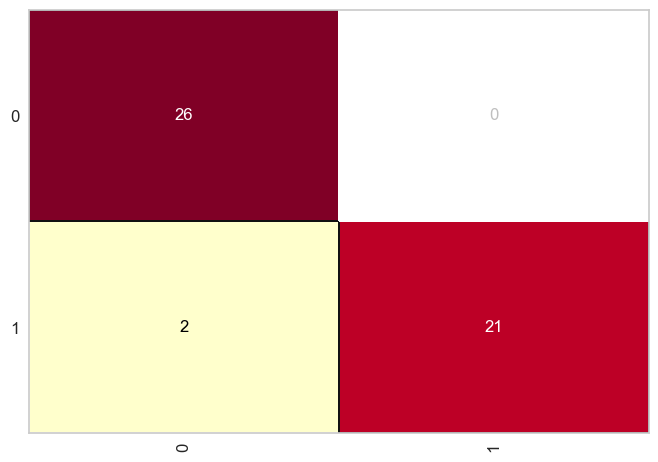

In [18]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}
model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

In [20]:
from joblib import dump
dump(random_forest, 'random_forest_model.joblib')
dump(scaler, 'scaler.joblib')
dump(label_encoder_Gender, 'label_encoder_Gender.joblib')
dump(label_encoder_Married, 'label_encoder_Married.joblib')
dump(label_encoder_Dependents, 'label_encoder_Dependents.joblib')
dump(label_encoder_Education, 'label_encoder_Education.joblib')
dump(label_encoder_Self_Employed, 'label_encoder_Self_Employed.joblib')
dump(label_encoder_Property_Area, 'label_encoder_Property_Area.joblib')

['label_encoder_Property_Area.joblib']